<a href="https://colab.research.google.com/github/svetlana-voskr/Neural-ACT-masses/blob/lana/neural%20networks/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import clear_output

In [2]:
import torch
from torch.nn.functional import conv2d
import torch.nn as nn
import torch.nn.functional as F
import torchvision

Скачаем и подготовим данные для классификации.

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

In [4]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST('./mnist/', train=True, download=True, transform=transform)

# используем готовый класс от торча для загрузки данных для валидации
mnist_val = torchvision.datasets.MNIST('./mnist/', train=False, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [5]:
# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

# так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

Посмотрим на изображения

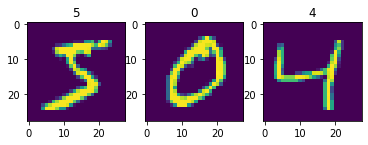

In [9]:
for i in [0, 1, 2]:
    plt.subplot(1, 3, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()